# Graph theory and Neural Netowrks

In this notebook we will be discussing the concepts of Graphical Structures and performing GCN and LightGCN on a dataset.

#### Let us create a star using Graph theory

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

An Undirected Graph


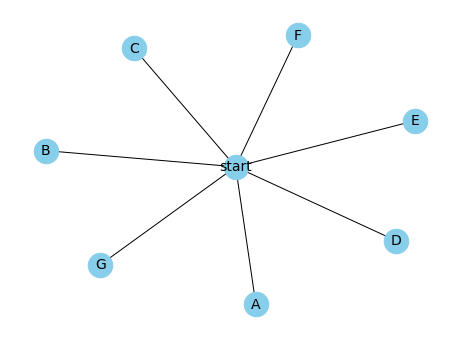

In [90]:
# Making an Undirected Graph
G = nx.Graph()

nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

G.add_node('start')
G.add_edges_from(('start', node) for node in nodes)

plt.figure(figsize=(8, 6))
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 node_color='skyblue',
                 font_size=14,
                 font_color='black'
                 )
print('An Undirected Graph')
plt.show()

A Directed Graph


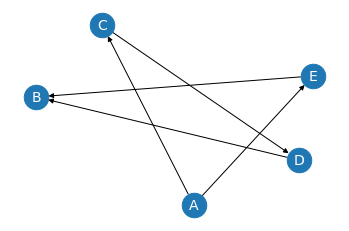

In [76]:
# Making a Directed graph
DG = nx.DiGraph()
DG.add_edges_from([('A', 'C'), ('C', 'D'), ('D','B'), ('A', 'E'), ('E', 'B')])

plt.axis('off')
nx.draw_networkx(DG,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )
print('A Directed Graph')

A Weighted Graph


{('A', 'C'): Text(-0.21224700659011955, -0.07255154410878933, '10'),
 ('A', 'E'): Text(0.5302509446772736, -0.3335007696647331, '40'),
 ('C', 'D'): Text(0.1577285381305059, 0.15791616369661593, '20'),
 ('D', 'B'): Text(-0.0749818401388383, -0.2110095903687138, '30'),
 ('B', 'E'): Text(-0.02479167046326264, 0.2219119391602675, '50')}

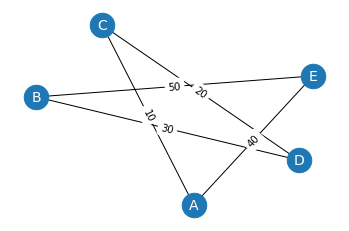

In [78]:
# Adding weights to the graphs

WG = nx.Graph()
WG.add_edges_from([('A', 'C', {"weight": 10}), ('C', 'D', {"weight": 20}), ('D', 'B', {"weight": 30}), 
                   ('A', 'E', {"weight": 40}), ('E', 'B', {"weight": 50})])
labels = nx.get_edge_attributes(WG, "weight")

plt.axis('off')
nx.draw_networkx(WG,
                 pos=nx.spring_layout(G, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )
print("A Weighted Graph")
nx.draw_networkx_edge_labels(WG, pos=nx.spring_layout(G, seed=0), edge_labels=labels)

Is graph 1 connected? False
Is graph 2 connected? True


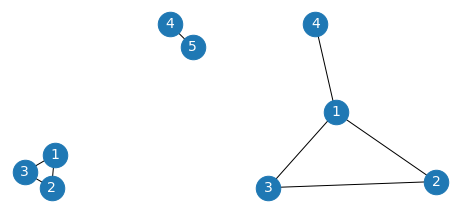

In [20]:
# Let us consider connections of graphs
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5)])
print(f"Is graph 1 connected? {nx.is_connected(G1)}")

G2 = nx.Graph()
G2.add_edges_from([(1, 2), (2, 3), (3, 1), (1, 4)])
print(f"Is graph 2 connected? {nx.is_connected(G2)}")

plt.figure(figsize=(8,8))
plt.subplot(221)
plt.axis('off')
nx.draw_networkx(G1,
                 pos=nx.spring_layout(G1, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )
plt.subplot(222)
plt.axis('off')
nx.draw_networkx(G2,
                 pos=nx.spring_layout(G2, seed=0),
                 node_size=600,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

#### Karate Club Dataset already has the node and edge embeddings.

We will use a simple NetworkX library to showcase a format of how 2 different classes are interlinked to each other. 

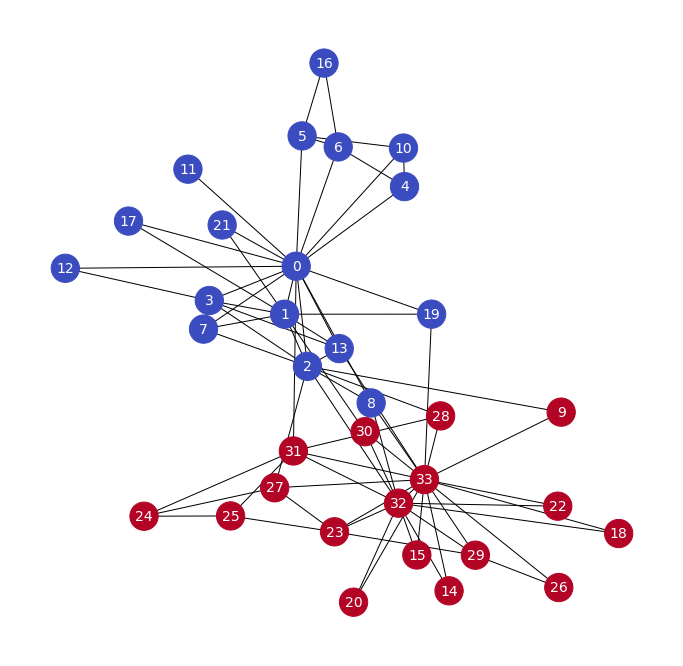

In [24]:
# Load dataset
G = nx.karate_club_graph()

# Process labels (Mr. Hi = 0, Officer = 1)
labels = []
for node in G.nodes:
    label = G.nodes[node]['club']
    labels.append(1 if label == 'Officer' else 0)

# Plot graph
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 node_color=labels,
                 node_size=800,
                 cmap='coolwarm',
                 font_size=14,
                 font_color='white'
                 )

## Extracting information from Dataset using Node2Vec & Graph Networks

1. We shall extract the directory and data from the zipped file.

In [40]:
from zipfile import ZipFile
zip_file_path = "C:\\Users\\vansh\\Downloads\\A\\ml-100k.zip"
with ZipFile(zip_file_path, 'r') as zfile:
    zfile.extractall('.')

Data - contains the information about the UID, MovieID, rating, and timestamp of the Movies

Item - contains the MovieID and the name of the movies

In [45]:
data_file_path = "./ml-100k/u.data"
ratings = pd.read_csv(data_file_path, sep='\t', names=['user_id', 'movie_id', 'rating', 'unix_timestamp'])
ratings

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [46]:
movies = pd.read_csv('ml-100k/u.item', sep='|', usecols=range(2), names=['movie_id', 'title'], encoding='latin-1')
movies

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [47]:
# Only consider ratings with the highest score
ratings = ratings[ratings.rating >= 4]
ratings

,user_id,movie_id,rating,unix_timestamp
5,298,474,4,884182806
7,253,465,5,891628467
11,286,1014,5,879781125
12,200,222,5,876042340
16,122,387,5,879270459
...,...,...,...,...
99988,421,498,4,892241344
99989,495,1091,4,888637503
99990,806,421,4,882388897
99991,676,538,4,892685437


In [48]:
from collections import defaultdict

pairs = defaultdict(int)

# Loop through the entire list of users
for group in ratings.groupby("user_id"):
    # List of IDs of movies rated by the current user
    user_movies = list(group[1]["movie_id"])

    # Count every time two movies are seen together
    for i in range(len(user_movies)):
        for j in range(i+1, len(user_movies)):
            pairs[(user_movies[i], user_movies[j])] += 1

Here, we are creating a pair of movies and their

Nodes are the movie IDs (meeting the criteria ratings > 4)

Edges are the are links between two nodes that represent the same movies liked by two users.

Edge Weight indicates how many times the two movies were rated highly (i.e., rating >= 4) by the same users.
An edge is added only if the weight (i.e., the number of users who liked both movies) is at least 20.

Used the Node2Vec algorithm to generate embeddings for the nodes (movies) in the graph.
Node2Vec is a method to learn continuous feature representations for nodes in a graph by simulating random walks and using these walks to train a skip-gram model (similar to Word2Vec).



##### Nodes: 
Movies that users rated highly.

##### Edges: 
Connections between movies that were liked by at least 20 users, with edge weights representing the number of users who liked both movies.

##### Outcome: 
The Node2Vec model generated embeddings for the movies, capturing their relationships based on user preferences. This can be useful for recommendation systems and other analysis tasks involving movie similarities.

In [74]:
# Create a networkx graph
G = nx.Graph()

# Try to create an edge between movies that are liked together
for pair in pairs:
    movie1, movie2 = pair
    score = pairs[pair]

    # The edge is only created when the score is high enough
    if score >= 20:
        G.add_edge(movie1, movie2, weight=score)

print("Total number of graph nodes:", G.number_of_nodes())
print("Total number of graph edges:", G.number_of_edges())

Total number of graph nodes: 410
Total number of graph edges: 14936


In [50]:
from node2vec import Node2Vec

node2vec = Node2Vec(G, dimensions=64, walk_length=20, num_walks=200, p=2, q=1, workers=1)

model = node2vec.fit(window=10, min_count=1, batch_words=4)

Computing transition probabilities:   0%|          | 0/410 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████| 200/200 [00:37<00:00,  5.36it/s]


In [51]:
def recommend(movie):
    movie_id = str(movies[movies.title == movie].movie_id.values[0])
    for id in model.wv.most_similar(movie_id)[:5]:
        title = movies[movies.movie_id == int(id[0])].title.values[0]
        print(f'{title}: {id[1]:.2f}')

recommend('Star Wars (1977)')

Return of the Jedi (1983): 0.66
Raiders of the Lost Ark (1981): 0.60
Toy Story (1995): 0.53
Silence of the Lambs, The (1991): 0.50
Monty Python and the Holy Grail (1974): 0.46


##### Conclusion:
We can observe that Return of the Jedi (1983) is the most liked movie, and following are the other movies in the top 5.

## Using VanillaGNN on Cora & FaceBook Datasets

In [52]:
import torch
!pip install -q torch-scatter~=2.1.0 torch-sparse~=0.6.16 torch-cluster~=1.6.0 torch-spline-conv~=1.2.1 torch-geometric==2.2.0 -f https://data.pyg.org/whl/torch-{torch.__version__}.html

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\vansh\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\vansh\\AppData\\Local\\Temp\\pip-install-q_x7e8m5\\torch-scatter_aa30e9fa38d24605aedcbb220cc0a12a\\setup.py'"'"'; __file__='"'"'C:\\Users\\vansh\\AppData\\Local\\Temp\\pip-install-q_x7e8m5\\torch-scatter_aa30e9fa38d24605aedcbb220cc0a12a\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\vansh\AppData\Local\Temp\pip-wheel-xos_45bj'
       cwd: C:\Users\vansh\AppData\Local\Temp\pip-install-q_x7e8m5\torch-scatter_aa30e9fa38d24605aedcbb220cc0a12a\
  Complete output (33 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.w

1. Downloading Cora Dataset from Planetoid Dataset and FaceBookPagePage Dataset from Torch Geometric library.

2. These are already adjusted as nodes and edges.


#### Objective:
To make a Comparative Analysis and test 2 models, MultiLayer Perceprton test and VanillaGNN.

In [53]:
from torch_geometric.datasets import Planetoid

# Import dataset from PyTorch Geometric
dataset = Planetoid(root=".", name="Cora")

data = dataset[0]

# Print information about the dataset
print(f'Dataset: {dataset}')
print('---------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of nodes: {data.x.shape[0]}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

# Print information about the graph
print(f'\nGraph:')
print('------')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Processing...
Done!


Dataset: Cora()
---------------
Number of graphs: 1
Number of nodes: 2708
Number of features: 1433
Number of classes: 7

Graph:
------
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


In [54]:
from torch_geometric.datasets import FacebookPagePage

# Import dataset from PyTorch Geometric
dataset = FacebookPagePage(root=".")

data = dataset[0]

# Print information about the dataset
print(f'Dataset: {dataset}')
print('-----------------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of nodes: {data.x.shape[0]}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

# Print information about the graph
print(f'\nGraph:')
print('------')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

# Create masks
data.train_mask = range(18000)
data.val_mask = range(18001, 20000)
data.test_mask = range(20001, 22470)

Processing...
Done!


Dataset: FacebookPagePage()
-----------------------
Number of graphs: 1
Number of nodes: 22470
Number of features: 128
Number of classes: 4

Graph:
------
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: True


In [56]:
# CORA DATASET
import pandas as pd

dataset = Planetoid(root=".", name="Cora")
data = dataset[0]

df_x = pd.DataFrame(data.x.numpy())
df_x['label'] = pd.DataFrame(data.y)
df_x

,0,1,2,3,4,5,6,7,8,9,...,1424,1425,1426,1427,1428,1429,1430,1431,1432,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2704,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [57]:
import torch
torch.manual_seed(0)
from torch.nn import Linear
import torch.nn.functional as F


def accuracy(y_pred, y_true):
    """Calculate accuracy."""
    return torch.sum(y_pred == y_true) / len(y_true)


class MLP(torch.nn.Module):
    """Multilayer Perceptron"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.linear1 = Linear(dim_in, dim_h)
        self.linear2 = Linear(dim_h, dim_out)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        return F.log_softmax(x, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(),
                                          lr=0.01,
                                          weight_decay=5e-4)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1),
                          data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1),
                                  data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc:'
                      f' {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | '
                      f'Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()      
    def test(self, data):
        self.eval()
        out = self(data.x)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

# Create MLP model
mlp = MLP(dataset.num_features, 16, dataset.num_classes)
print(mlp)

# Train
mlp.fit(data, epochs=100)

# Test
acc = mlp.test(data)
print(f'\nMLP test accuracy: {acc*100:.2f}%')

MLP(
  (linear1): Linear(in_features=1433, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=7, bias=True)
)
Epoch   0 | Train Loss: 1.959 | Train Acc: 14.29% | Val Loss: 2.00 | Val Acc: 12.40%
Epoch  20 | Train Loss: 0.110 | Train Acc: 100.00% | Val Loss: 1.46 | Val Acc: 49.40%
Epoch  40 | Train Loss: 0.014 | Train Acc: 100.00% | Val Loss: 1.44 | Val Acc: 51.00%
Epoch  60 | Train Loss: 0.008 | Train Acc: 100.00% | Val Loss: 1.40 | Val Acc: 53.80%
Epoch  80 | Train Loss: 0.008 | Train Acc: 100.00% | Val Loss: 1.37 | Val Acc: 55.40%
Epoch 100 | Train Loss: 0.009 | Train Acc: 100.00% | Val Loss: 1.34 | Val Acc: 54.60%

MLP test accuracy: 53.40%


In [58]:
class VanillaGNNLayer(torch.nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()
        self.linear = Linear(dim_in, dim_out, bias=False)

    def forward(self, x, adjacency):
        x = self.linear(x)
        x = torch.sparse.mm(adjacency, x)
        return x

In [59]:
from torch_geometric.utils import to_dense_adj

adjacency = to_dense_adj(data.edge_index)[0]
adjacency += torch.eye(len(adjacency))
adjacency

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 1.],
        [0., 0., 0.,  ..., 0., 1., 1.]])

In [60]:
class VanillaGNN(torch.nn.Module):
    """Vanilla Graph Neural Network"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gnn1 = VanillaGNNLayer(dim_in, dim_h)
        self.gnn2 = VanillaGNNLayer(dim_h, dim_out)

    def forward(self, x, adjacency):
        h = self.gnn1(x, adjacency)
        h = torch.relu(h)
        h = self.gnn2(h, adjacency)
        return F.log_softmax(h, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(),
                                      lr=0.01,
                                      weight_decay=5e-4)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, adjacency)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1),
                          data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1),
                                  data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc:'
                      f' {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | '
                      f'Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, adjacency)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

# Create the Vanilla GNN model
gnn = VanillaGNN(dataset.num_features, 16, dataset.num_classes)
print(gnn)

# Train
gnn.fit(data, epochs=100)

# Test
acc = gnn.test(data)
print(f'\nGNN test accuracy: {acc*100:.2f}%')

VanillaGNN(
  (gnn1): VanillaGNNLayer(
    (linear): Linear(in_features=1433, out_features=16, bias=False)
  )
  (gnn2): VanillaGNNLayer(
    (linear): Linear(in_features=16, out_features=7, bias=False)
  )
)
Epoch   0 | Train Loss: 1.991 | Train Acc: 15.71% | Val Loss: 2.11 | Val Acc: 9.40%
Epoch  20 | Train Loss: 0.065 | Train Acc: 99.29% | Val Loss: 1.47 | Val Acc: 76.80%
Epoch  40 | Train Loss: 0.014 | Train Acc: 100.00% | Val Loss: 2.11 | Val Acc: 75.40%
Epoch  60 | Train Loss: 0.007 | Train Acc: 100.00% | Val Loss: 2.22 | Val Acc: 75.40%
Epoch  80 | Train Loss: 0.004 | Train Acc: 100.00% | Val Loss: 2.20 | Val Acc: 76.80%
Epoch 100 | Train Loss: 0.003 | Train Acc: 100.00% | Val Loss: 2.19 | Val Acc: 77.00%

GNN test accuracy: 76.60%


In [61]:
# Dataset
dataset = FacebookPagePage(root=".")
data = dataset[0]
data.train_mask = range(18000)
data.val_mask = range(18001, 20000)
data.test_mask = range(20001, 22470)

# Adjacency matrix
adjacency = to_dense_adj(data.edge_index)[0]
adjacency += torch.eye(len(adjacency))
adjacency

# MLP
mlp = MLP(dataset.num_features, 16, dataset.num_classes)
print(mlp)
mlp.fit(data, epochs=100)
acc = mlp.test(data)
print(f'\nMLP test accuracy: {acc*100:.2f}%\n')

# GCN
gnn = VanillaGNN(dataset.num_features, 16, dataset.num_classes)
print(gnn)
gnn.fit(data, epochs=100)
acc = gnn.test(data)
print(f'\nGNN test accuracy: {acc*100:.2f}%')

MLP(
  (linear1): Linear(in_features=128, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=4, bias=True)
)
Epoch   0 | Train Loss: 1.401 | Train Acc: 28.11% | Val Loss: 1.40 | Val Acc: 28.91%
Epoch  20 | Train Loss: 0.671 | Train Acc: 73.47% | Val Loss: 0.68 | Val Acc: 72.94%
Epoch  40 | Train Loss: 0.579 | Train Acc: 76.95% | Val Loss: 0.61 | Val Acc: 74.89%
Epoch  60 | Train Loss: 0.549 | Train Acc: 78.20% | Val Loss: 0.60 | Val Acc: 75.59%
Epoch  80 | Train Loss: 0.533 | Train Acc: 78.76% | Val Loss: 0.60 | Val Acc: 75.39%
Epoch 100 | Train Loss: 0.520 | Train Acc: 79.23% | Val Loss: 0.60 | Val Acc: 75.39%

MLP test accuracy: 75.33%

VanillaGNN(
  (gnn1): VanillaGNNLayer(
    (linear): Linear(in_features=128, out_features=16, bias=False)
  )
  (gnn2): VanillaGNNLayer(
    (linear): Linear(in_features=16, out_features=4, bias=False)
  )
)
Epoch   0 | Train Loss: 176.683 | Train Acc: 28.31% | Val Loss: 173.10 | Val Acc: 28.41%
Epoch  20 | Train Loss: 6.675 

#### Outcome:
We can observe that in both, Cora and FaceBookPagePage Datasets, the accuracy levels are higher when VanillaGNN is applied as compared to when MultiLayer Perceptron is. Hence, we can conclude that Graph Neural Networks provide better and more in-depth analytics than normal, basic models.

## Expressiveness of Graph Classification - Using GINConv & GNCConv

We are using Proteins Dataset from TUDataset which is a database from torch geometric datasets.

#### Objective:
To Showcase the ideal performance of different models from Graph Convolution Networks such as GINConv & GNCConv and observe which is a better model.

In [66]:
import torch
!pip install -q torch-scatter~=2.1.0 torch-sparse~=0.6.16 torch-cluster~=1.6.0 torch-spline-conv~=1.2.1 torch-geometric==2.2.0 -f https://data.pyg.org/whl/torch-{torch.__version__}.html

torch.manual_seed(11)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\vansh\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\vansh\\AppData\\Local\\Temp\\pip-install-5778bj5z\\torch-scatter_31d1cf289ea248f1828b77c454ba94b7\\setup.py'"'"'; __file__='"'"'C:\\Users\\vansh\\AppData\\Local\\Temp\\pip-install-5778bj5z\\torch-scatter_31d1cf289ea248f1828b77c454ba94b7\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\vansh\AppData\Local\Temp\pip-wheel-5m00yo0h'
       cwd: C:\Users\vansh\AppData\Local\Temp\pip-install-5778bj5z\torch-scatter_31d1cf289ea248f1828b77c454ba94b7\
  Complete output (33 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.w

In [67]:
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='.', name='PROTEINS').shuffle()

# Print information about the dataset
print(f'Dataset: {dataset}')
print('-----------------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of nodes: {dataset[0].x.shape[0]}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Extracting .\PROTEINS\PROTEINS.zip
Processing...


Dataset: PROTEINS(1113)
-----------------------
Number of graphs: 1113
Number of nodes: 14
Number of features: 3
Number of classes: 2


Done!


In [68]:
from torch_geometric.loader import DataLoader

# Create training, validation, and test sets
train_dataset = dataset[:int(len(dataset)*0.8)]
val_dataset   = dataset[int(len(dataset)*0.8):int(len(dataset)*0.9)]
test_dataset  = dataset[int(len(dataset)*0.9):]

print(f'Training set   = {len(train_dataset)} graphs')
print(f'Validation set = {len(val_dataset)} graphs')
print(f'Test set       = {len(test_dataset)} graphs')

# Create mini-batches
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=True)

print('\nTrain loader:')
for i, batch in enumerate(train_loader):
    print(f' - Batch {i}: {batch}')

print('\nValidation loader:')
for i, batch in enumerate(val_loader):
    print(f' - Batch {i}: {batch}')

print('\nTest loader:')
for i, batch in enumerate(test_loader):
    print(f' - Batch {i}: {batch}')

Training set   = 890 graphs
Validation set = 111 graphs
Test set       = 112 graphs

Train loader:
 - Batch 0: DataBatch(edge_index=[2, 9274], x=[2468, 3], y=[64], batch=[2468], ptr=[65])
 - Batch 1: DataBatch(edge_index=[2, 8972], x=[2366, 3], y=[64], batch=[2366], ptr=[65])
 - Batch 2: DataBatch(edge_index=[2, 8820], x=[2350, 3], y=[64], batch=[2350], ptr=[65])
 - Batch 3: DataBatch(edge_index=[2, 9596], x=[2570, 3], y=[64], batch=[2570], ptr=[65])
 - Batch 4: DataBatch(edge_index=[2, 9108], x=[2490, 3], y=[64], batch=[2490], ptr=[65])
 - Batch 5: DataBatch(edge_index=[2, 10022], x=[2637, 3], y=[64], batch=[2637], ptr=[65])
 - Batch 6: DataBatch(edge_index=[2, 9732], x=[2726, 3], y=[64], batch=[2726], ptr=[65])
 - Batch 7: DataBatch(edge_index=[2, 9316], x=[2533, 3], y=[64], batch=[2533], ptr=[65])
 - Batch 8: DataBatch(edge_index=[2, 7994], x=[2074, 3], y=[64], batch=[2074], ptr=[65])
 - Batch 9: DataBatch(edge_index=[2, 11984], x=[3267, 3], y=[64], batch=[3267], ptr=[65])
 - Batch 

In [69]:
import torch
torch.manual_seed(0)
import torch.nn.functional as F
from torch.nn import Linear, Sequential, BatchNorm1d, ReLU, Dropout
from torch_geometric.nn import GCNConv, GINConv
from torch_geometric.nn import global_mean_pool, global_add_pool


class GCN(torch.nn.Module):
    """GCN"""
    def __init__(self, dim_h):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, dim_h)
        self.conv2 = GCNConv(dim_h, dim_h)
        self.conv3 = GCNConv(dim_h, dim_h)
        self.lin = Linear(dim_h, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        # Node embeddings 
        h = self.conv1(x, edge_index)
        h = h.relu()
        h = self.conv2(h, edge_index)
        h = h.relu()
        h = self.conv3(h, edge_index)

        # Graph-level readout
        hG = global_mean_pool(h, batch)

        # Classifier
        h = F.dropout(hG, p=0.5, training=self.training)
        h = self.lin(h)
        
        return F.log_softmax(h, dim=1)

class GIN(torch.nn.Module):
    """GIN"""
    def __init__(self, dim_h):
        super(GIN, self).__init__()
        self.conv1 = GINConv(
            Sequential(Linear(dataset.num_node_features, dim_h),
                       BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv2 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.conv3 = GINConv(
            Sequential(Linear(dim_h, dim_h), BatchNorm1d(dim_h), ReLU(),
                       Linear(dim_h, dim_h), ReLU()))
        self.lin1 = Linear(dim_h*3, dim_h*3)
        self.lin2 = Linear(dim_h*3, dataset.num_classes)

    def forward(self, x, edge_index, batch):
        # Node embeddings 
        h1 = self.conv1(x, edge_index)
        h2 = self.conv2(h1, edge_index)
        h3 = self.conv3(h2, edge_index)

        # Graph-level readout
        h1 = global_add_pool(h1, batch)
        h2 = global_add_pool(h2, batch)
        h3 = global_add_pool(h3, batch)

        # Concatenate graph embeddings
        h = torch.cat((h1, h2, h3), dim=1)

        # Classifier
        h = self.lin1(h)
        h = h.relu()
        h = F.dropout(h, p=0.5, training=self.training)
        h = self.lin2(h)
        
        return F.log_softmax(h, dim=1)

In [70]:
def train(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    epochs = 100

    model.train()
    for epoch in range(epochs+1):
        total_loss = 0
        acc = 0
        val_loss = 0
        val_acc = 0

        # Train on batches
        for data in loader:
            optimizer.zero_grad()
            out = model(data.x, data.edge_index, data.batch)
            loss = criterion(out, data.y)
            total_loss += loss / len(loader)
            acc += accuracy(out.argmax(dim=1), data.y) / len(loader)
            loss.backward()
            optimizer.step()

            # Validation
            val_loss, val_acc = test(model, val_loader)

        # Print metrics every 20 epochs
        if(epoch % 20 == 0):
            print(f'Epoch {epoch:>3} | Train Loss: {total_loss:.2f} | Train Acc: {acc*100:>5.2f}% | Val Loss: 
                  {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')
            
    return model

@torch.no_grad()
def test(model, loader):
    criterion = torch.nn.CrossEntropyLoss()
    model.eval()
    loss = 0
    acc = 0

    for data in loader:
        out = model(data.x, data.edge_index, data.batch)
        loss += criterion(out, data.y) / len(loader)
        acc += accuracy(out.argmax(dim=1), data.y) / len(loader)

    return loss, acc

def accuracy(pred_y, y):
    """Calculate accuracy."""
    return ((pred_y == y).sum() / len(y)).item()

gcn = GCN(dim_h=32)
gcn = train(gcn, train_loader)
test_loss, test_acc = test(gcn, test_loader)
print(f'Test Loss: {test_loss:.2f} | Test Acc: {test_acc*100:.2f}%')
print()

gin = GIN(dim_h=32)
gin = train(gin, train_loader)
test_loss, test_acc = test(gin, test_loader)
print(f'Test Loss: {test_loss:.2f} | Test Acc: {test_acc*100:.2f}%')

Epoch   0 | Train Loss: 0.68 | Train Acc: 58.36% | Val Loss: 0.67 | Val Acc: 60.47%
Epoch  20 | Train Loss: 0.60 | Train Acc: 71.10% | Val Loss: 0.58 | Val Acc: 72.17%
Epoch  40 | Train Loss: 0.60 | Train Acc: 70.45% | Val Loss: 0.60 | Val Acc: 64.44%
Epoch  60 | Train Loss: 0.59 | Train Acc: 71.09% | Val Loss: 0.58 | Val Acc: 74.52%
Epoch  80 | Train Loss: 0.59 | Train Acc: 71.80% | Val Loss: 0.59 | Val Acc: 71.54%
Epoch 100 | Train Loss: 0.59 | Train Acc: 71.04% | Val Loss: 0.58 | Val Acc: 71.61%
Test Loss: 0.64 | Test Acc: 67.97%

Epoch   0 | Train Loss: 1.01 | Train Acc: 57.70% | Val Loss: 0.57 | Val Acc: 71.83%
Epoch  20 | Train Loss: 0.52 | Train Acc: 76.11% | Val Loss: 0.51 | Val Acc: 78.92%
Epoch  40 | Train Loss: 0.50 | Train Acc: 76.40% | Val Loss: 0.47 | Val Acc: 77.36%
Epoch  60 | Train Loss: 0.49 | Train Acc: 76.07% | Val Loss: 0.49 | Val Acc: 78.64%
Epoch  80 | Train Loss: 0.50 | Train Acc: 76.15% | Val Loss: 0.52 | Val Acc: 72.04%
Epoch 100 | Train Loss: 0.47 | Train Acc

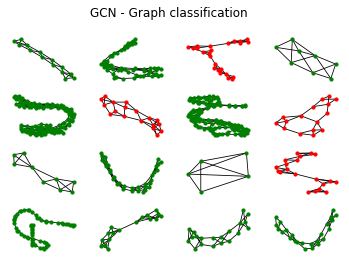

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import to_networkx

fig, ax = plt.subplots(4, 4)
fig.suptitle('GCN - Graph classification')

for i, data in enumerate(dataset[-16:]):
    # Calculate color (green if correct, red otherwise)
    out = gcn(data.x, data.edge_index, data.batch)
    color = "green" if out.argmax(dim=1) == data.y else "red"

    # Plot graph
    ix = np.unravel_index(i, ax.shape)
    ax[ix].axis('off')
    G = to_networkx(dataset[i], to_undirected=True)
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=False,
                    node_size=10,
                    node_color=color,
                    width=0.8,
                    ax=ax[ix]
                    )

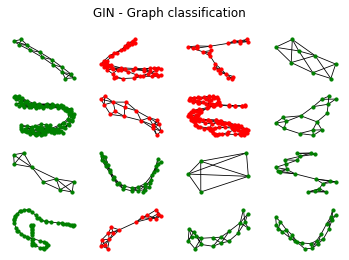

In [72]:
fig, ax = plt.subplots(4, 4)
fig.suptitle('GIN - Graph classification')

for i, data in enumerate(dataset[-16:]):
    # Calculate color (green if correct, red otherwise)
    out = gin(data.x, data.edge_index, data.batch)
    color = "green" if out.argmax(dim=1) == data.y else "red"

    # Plot graph
    ix = np.unravel_index(i, ax.shape)
    ax[ix].axis('off')
    G = to_networkx(dataset[i], to_undirected=True)
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=False,
                    node_size=10,
                    node_color=color,
                    width=0.8,
                    ax=ax[ix]
                    )

In [73]:
gcn.eval()
gin.eval()
acc_gcn = 0
acc_gin = 0
acc_ens = 0

for data in test_loader:
    # Get classifications
    out_gcn = gcn(data.x, data.edge_index, data.batch)
    out_gin = gin(data.x, data.edge_index, data.batch)
    out_ens = (out_gcn + out_gin)/2

    # Calculate accuracy scores
    acc_gcn += accuracy(out_gcn.argmax(dim=1), data.y) / len(test_loader)
    acc_gin += accuracy(out_gin.argmax(dim=1), data.y) / len(test_loader)
    acc_ens += accuracy(out_ens.argmax(dim=1), data.y) / len(test_loader)

# Print results
print(f'GCN accuracy:     {acc_gcn*100:.2f}%')
print(f'GIN accuracy:     {acc_gin*100:.2f}%')
print(f'GCN+GIN accuracy: {acc_ens*100:.2f}%')

GCN accuracy:     68.75%
GIN accuracy:     73.44%
GCN+GIN accuracy: 70.05%


#### Conclusions:

1. We can infer from the GNCConv and GINConv graphical structures that they look the similar. However, there is a lot of difference in their performance as observed in their accuracy levels.

2. Thus, even though the graphical structures are of look-alike proerty, there is a lot of difference in the matrix performance. 

Graphs can be a little deceptive, hence, a clear and deep understanding is very much necessary by the analysts.